<a href="https://colab.research.google.com/github/Umar-604/CS-351-AI-Lab-Github-Repository_2022604/blob/main/Umar_Tariq__CS_351L_Lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Lab 6 Task: K-Means Clustering with Visualizations**

K-Means Clustering is an unsupervised machine learning algorithm used to classify data into clusters based on their features. In this lab, we will implement a k-Means clustering algorithm from scratch using Python and visualize the clustering process at each step.

## Task Description

**Implement a k-Means clustering algorithm that:**
- Creates a synthetic dataset with features like Age, Height, and CGPA.
- Standardizes the dataset to ensure all features are on the same scale.
- Initializes centroids randomly, assigns data points to the nearest centroids, and updates centroids based on the mean of assigned points.
- Visualizes each step of the k-Means algorithm to show how data points are assigned and centroids are updated.

## Key Steps

- **Data Generation:** We create a synthetic dataset with three features: Age, Height, and CGPA. Each feature is generated randomly to simulate real-world data.

- **Feature Scaling:** Since the features (Age, Height, CGPA) have different ranges, we standardize the dataset using the `StandardScaler` to ensure all features are on the same scale. This is essential for k-Means, as it relies on Euclidean distances between data points and centroids.

- **Euclidean Distance:** The Euclidean distance formula is used to calculate the distance between any two points (data points and centroids). This distance is used to assign each data point to the nearest centroid.

- **K-Means Algorithm:** The k-Means algorithm is implemented with the following steps:
  1. **Initialization:** Centroids are initialized randomly from the data points.
  2. **Assignment:** Each data point is assigned to the nearest centroid based on Euclidean distance.
  3. **Update:** Centroids are updated by calculating the mean of all points assigned to each centroid.
  4. The algorithm repeats these steps until the centroids stop changing, indicating that the clusters have stabilized.

- **Step-by-Step Visualization:** The clustering process is visualized at every step. This includes:
  - Initial centroid placement.
  - Assignment of data points to the closest centroid.
  - Updating centroids based on the mean of assigned points.

## Algorithm Features

- **Initialization of Centroids:** Centroids are initialized randomly from the data points to start the clustering process.
  
- **Data Point Assignment:** In each iteration, data points are assigned to the centroid with the shortest Euclidean distance.

- **Centroid Update:** Centroids are updated by calculating the mean of the data points assigned to them, refining the cluster centers over iterations.

- **Convergence Check:** The algorithm stops when the centroids no longer change, meaning the clusters are stable.

- **Visualization:** Each step of the algorithm is visualized using `matplotlib`. This helps understand how the clusters are formed and how centroids move during the process.

---


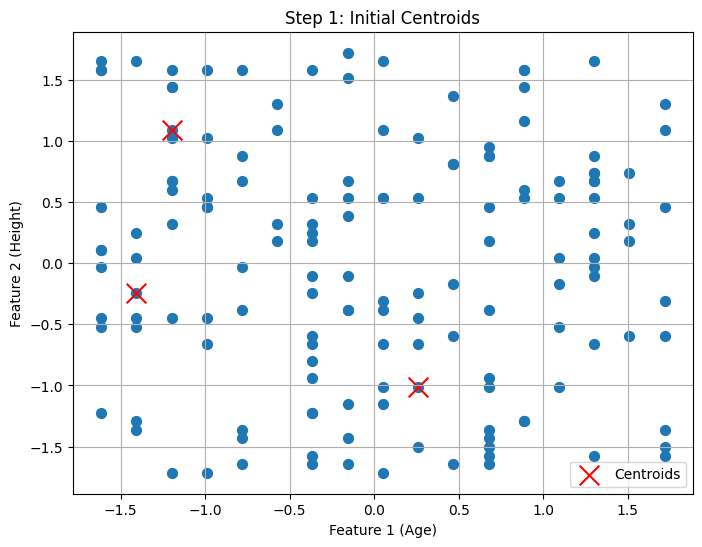

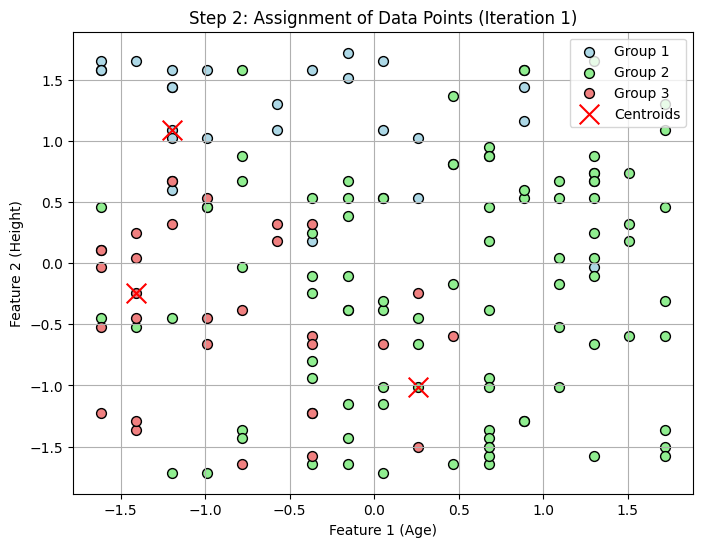

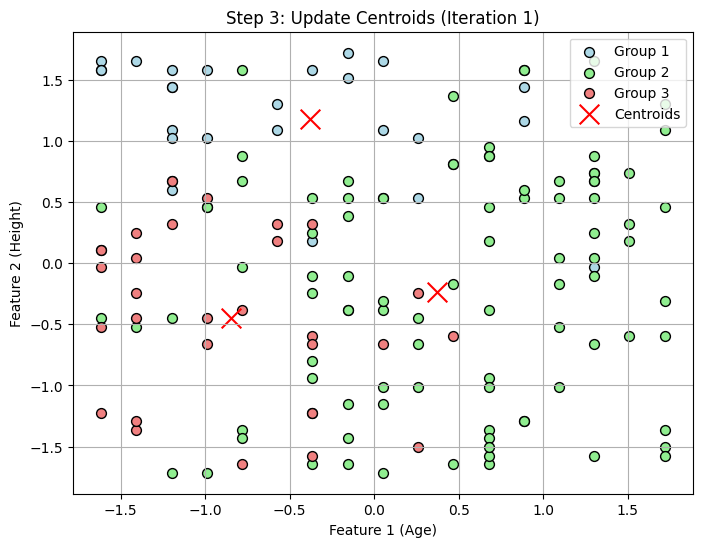

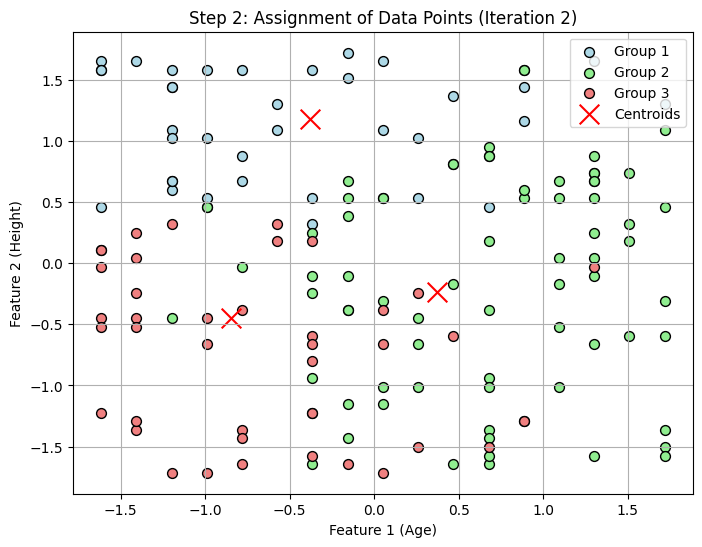

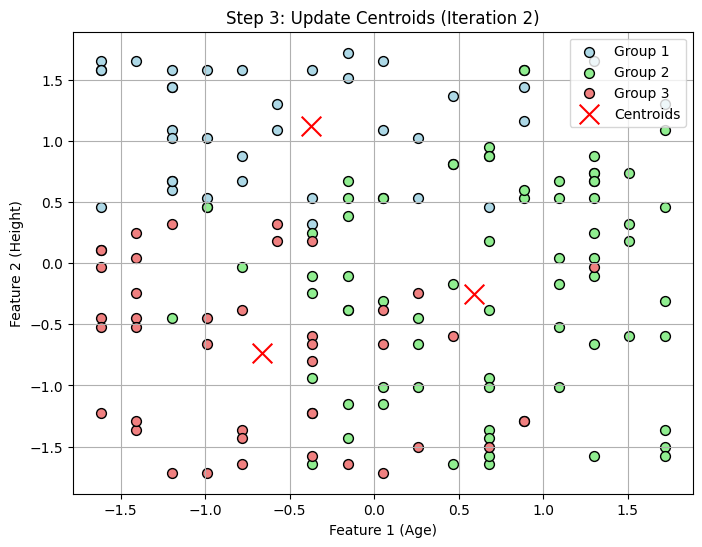

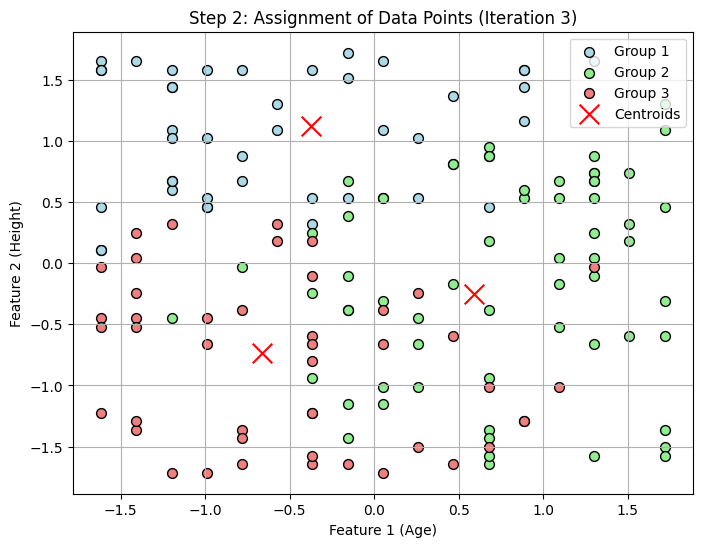

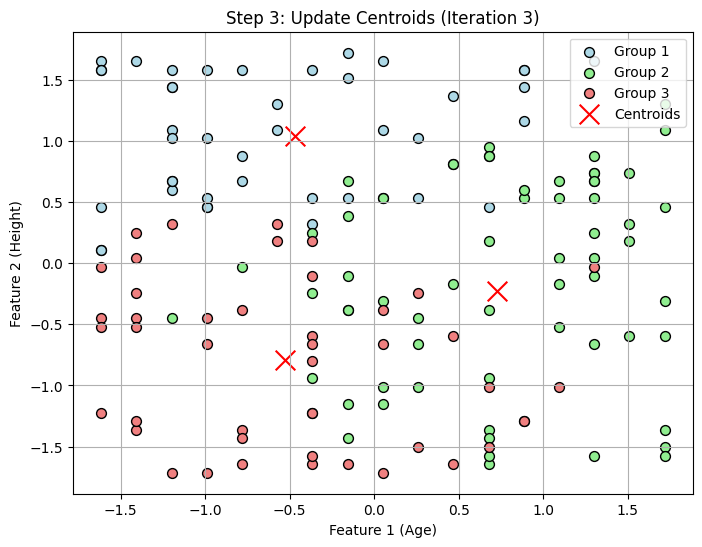

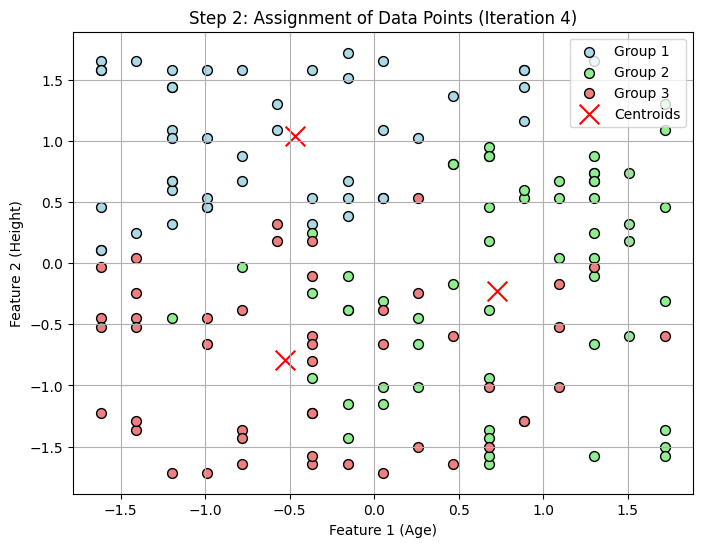

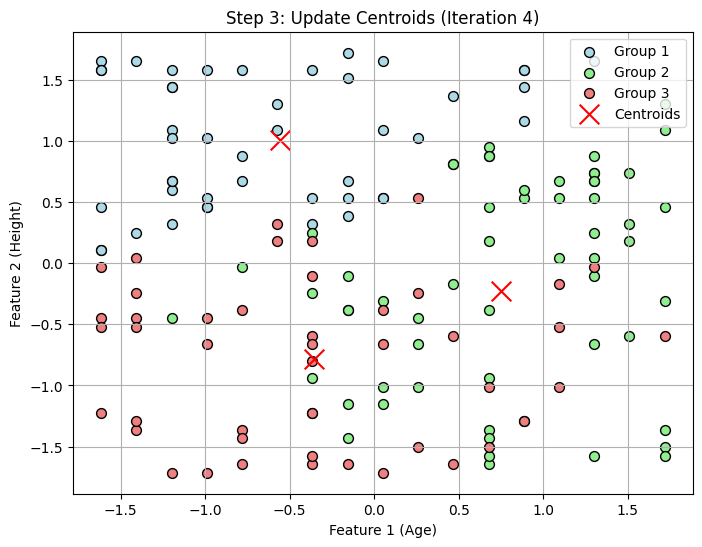

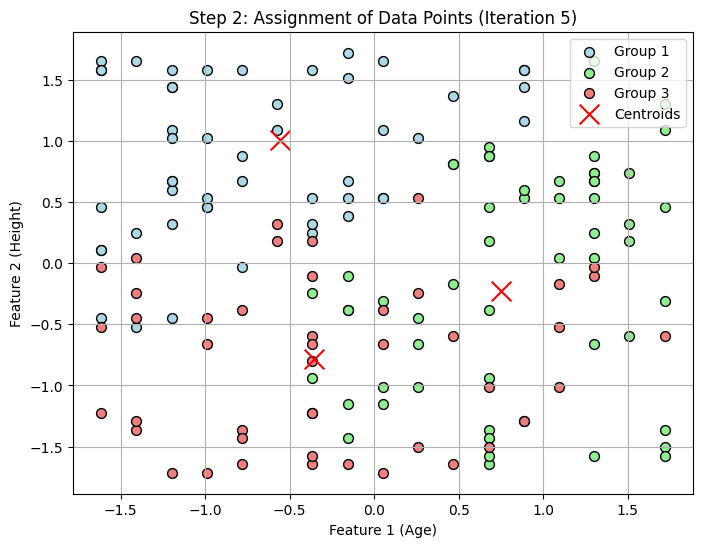

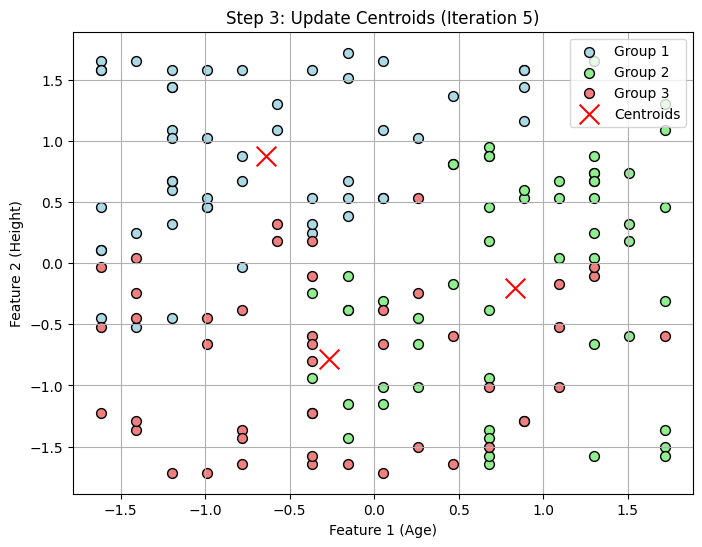

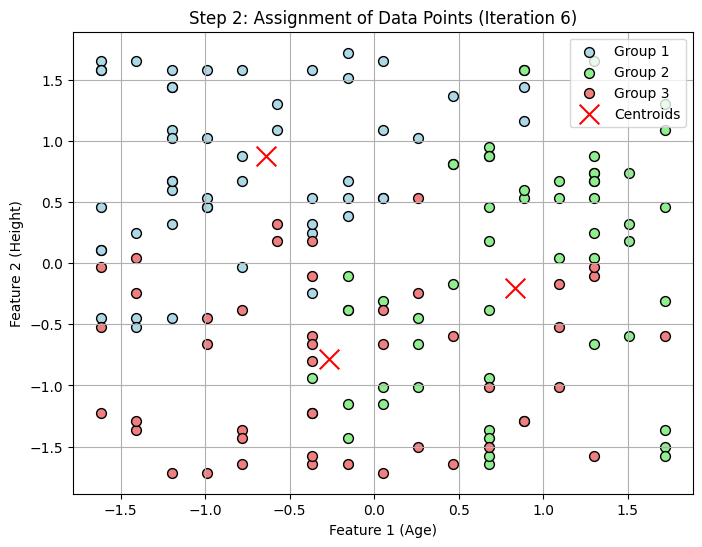

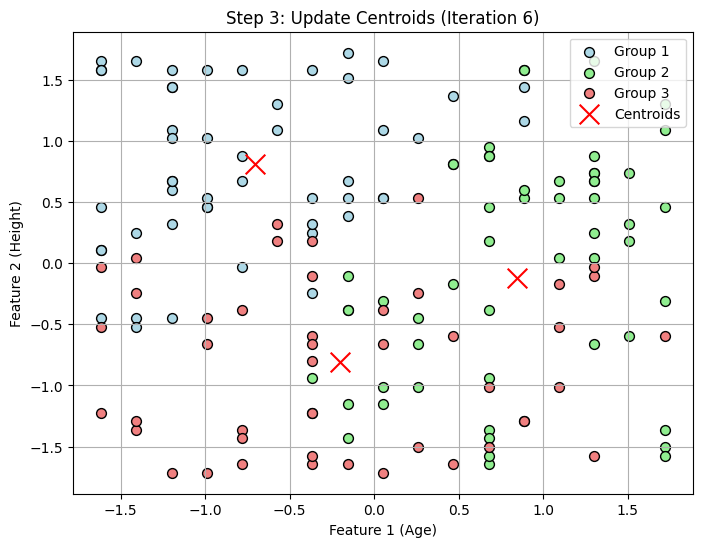

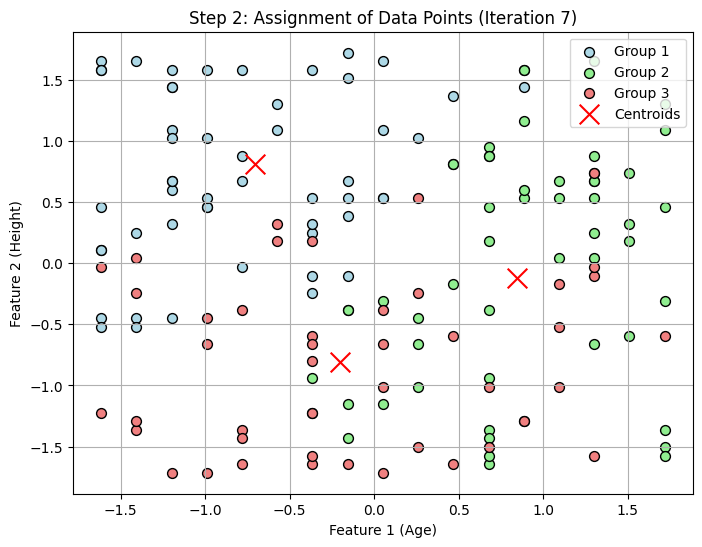

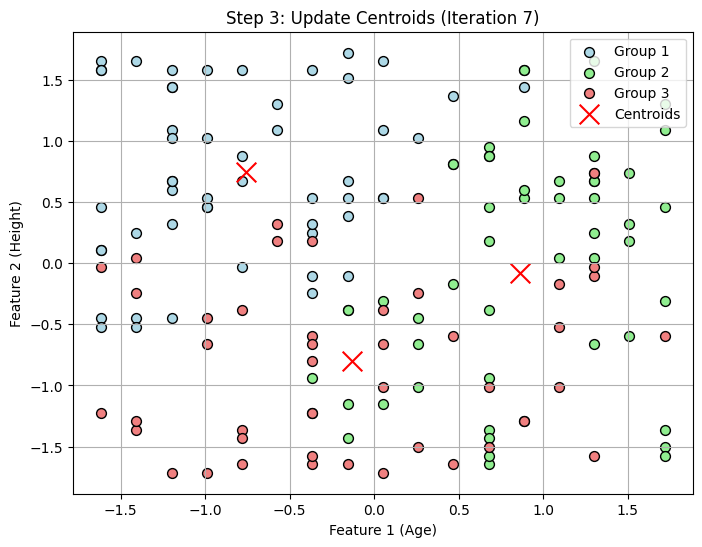

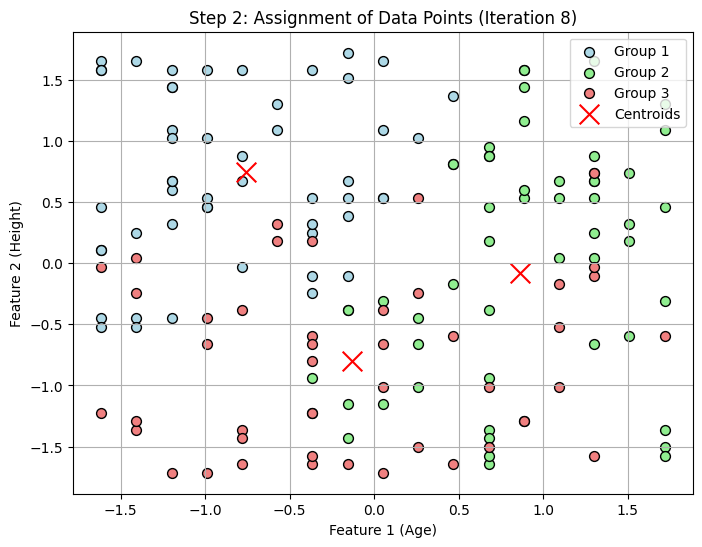

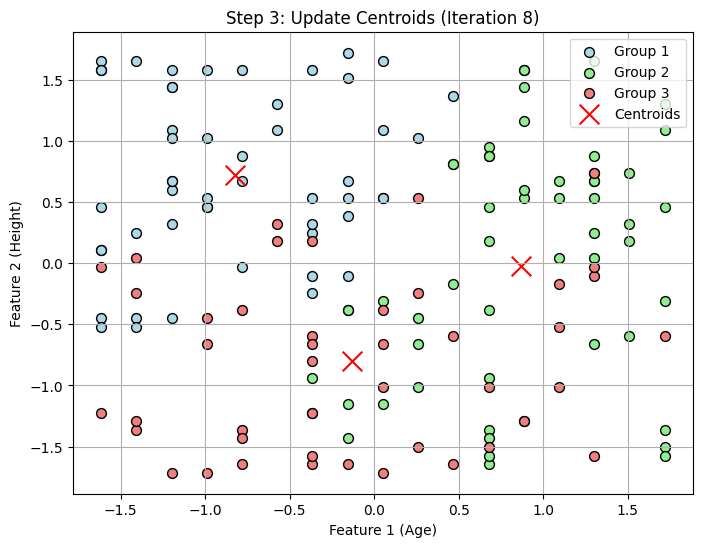

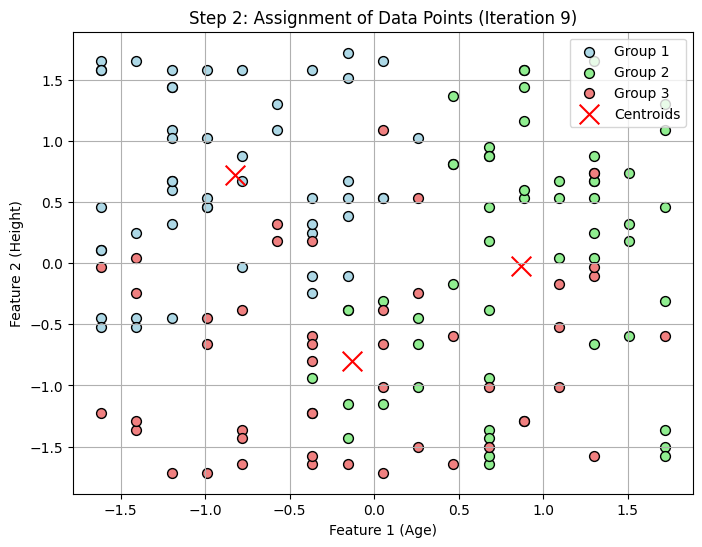

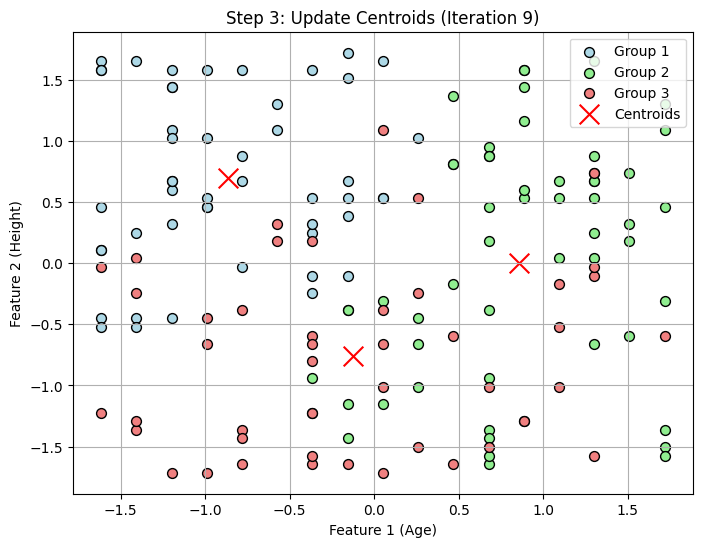

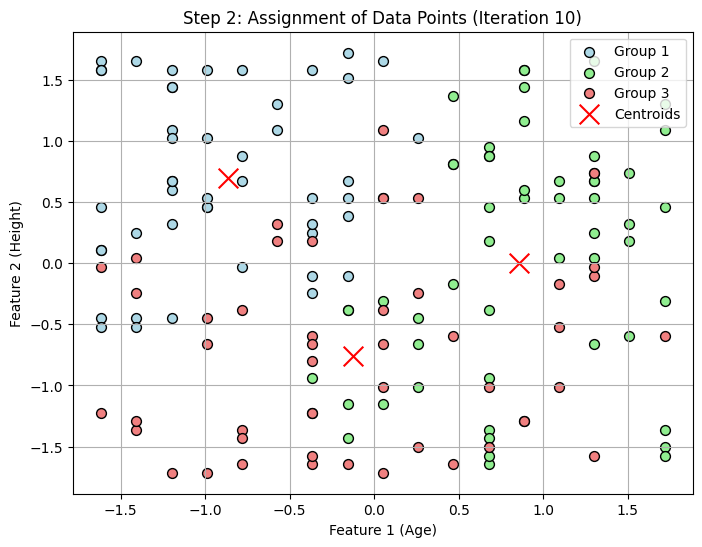

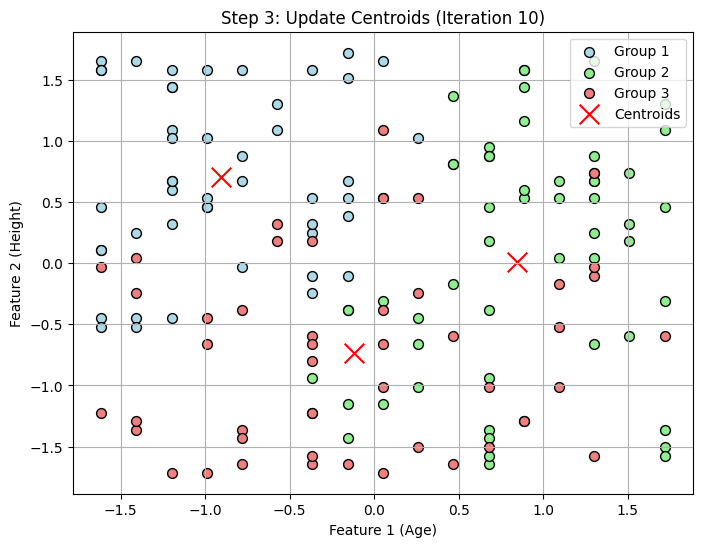

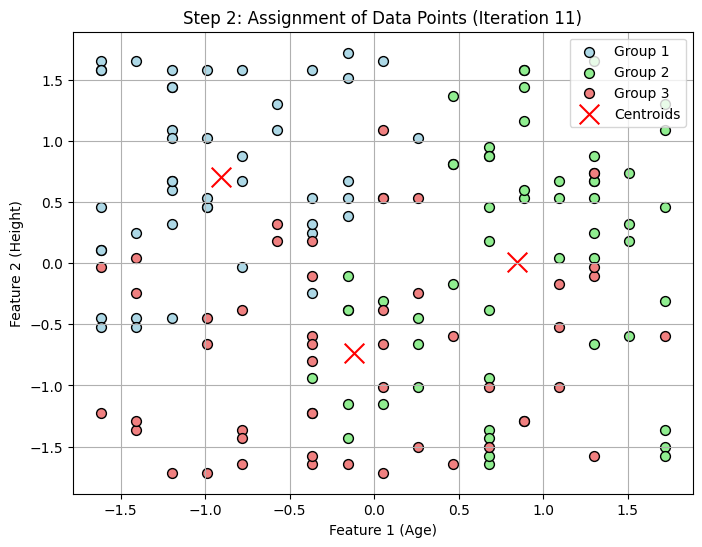

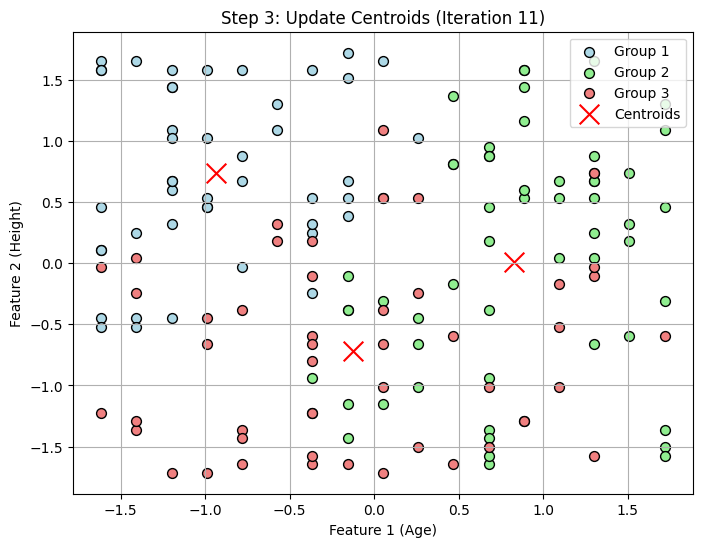

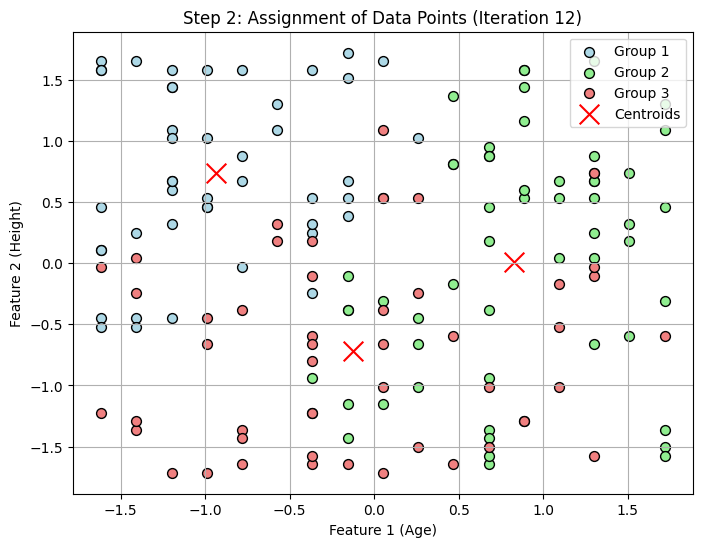

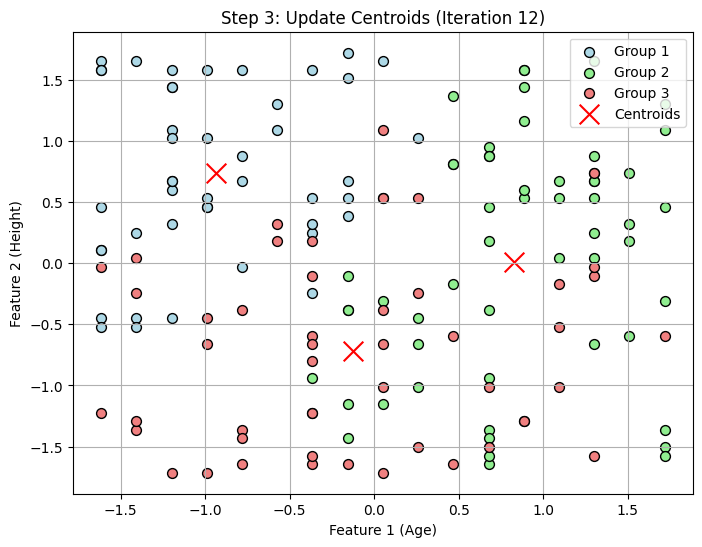

In [1]:
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling

# Create a synthetic dataset with Age, Height, and CGPA features
np.random.seed(42)  # Seed for reproducibility
n_samples = 150

# Generating random data for Age, Height, and CGPA
Age = np.random.randint(18, 35, size=n_samples)  # Random ages between 18 and 35
Height = np.random.randint(150, 200, size=n_samples)  # Random heights between 150 and 200 cm
CGPA = np.random.uniform(2.0, 4.0, size=n_samples)  # Random CGPA between 2.0 and 4.0

# Combine them into a single dataset
X = np.column_stack((Age, Height, CGPA))

# Standardize the features to ensure all features have the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return centroids, labels

# Function to visualize clustering process at each step, with custom class names and feature labels
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names and their corresponding colors
    class_names = {0: 'Group 1', 1: 'Group 2', 2: 'Group 3'}
    colors = ['lightblue', 'lightgreen', 'lightcoral']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=class_names[class_label], s=50, edgecolor='k', color=colors[class_label])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Feature 1 (Age)')
    plt.ylabel('Feature 2 (Height)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # We are setting 3 clusters

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)
